In [3]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#to show the plots in UI

#Modules

In [236]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#Separate dependant variable from the data and use it for analysis. But first do EDA
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

#Save the ID and drop it from the main table

train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop('Id', axis = 1, inplace = True)
df_test.drop('Id', axis = 1, inplace = True)


In [41]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [42]:
df_train.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The minimum Sale Price is more than zero. Since value has to be always we would like to predict by keepinf in the mind that we never get a negative value.


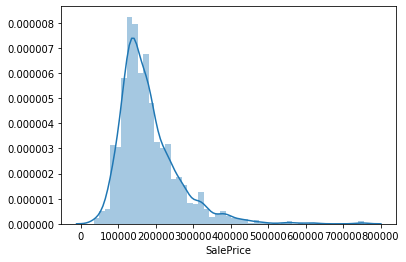

In [8]:
#Plot histogram for distribution
sns.distplot(df_train['SalePrice'])

The distribution deviates from normal deviation and right skewed. We can observe sharp peak in the plot also.

In [9]:
#The skewness and kurtosis of the 'SalePrice'

print('The skewness in the variable SalePrice is {:.3f}'.format(df_train['SalePrice'].skew()))
print('The kurtosis measure in the variable SalePrice is {:.3f}'.format(df_train['SalePrice'].kurt()))


The skewness in the variable SalePrice is 1.883
The kurtosis measure in the variable SalePrice is 6.536


In [10]:
#Next we will look into other variables from description which we assume may have some affect on the price

#first 'OverallQual'
df_train['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

(-0.5, 9.5, 0, 800000)

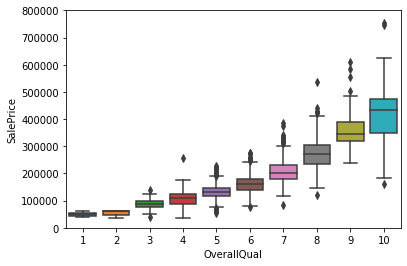

In [11]:
#SalePrice and OverallQual
df = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis = 1)
fig = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df)
fig.axis(ymin = 0, ymax = 800000)

Though the OverallQual is a int datatype but instead of using it as numerical variable we can use it a categorical type. As there seems to be an exponential increase in the price with the increse in the Overall Qual (Though how did they calculated this feature is unknown).

(-0.5, 111.5, 0, 800000)

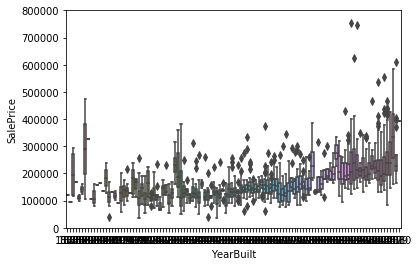

In [12]:
#SalePrice and YearBuilt
df1 = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis = 1)
#Sizing of the graph
fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = df1)
fig.axis(ymin = 0, ymax = 800000)

There is no sharp increase in the sales price with the increase in the number of years. There is gradual increase in the sales price.

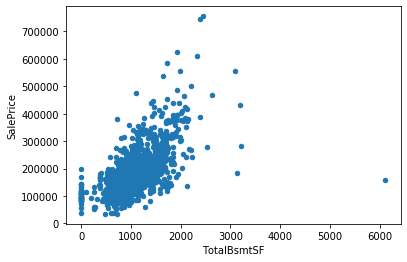

In [13]:
#Sales price and TotalBsmtSF(Total square feet of basement area)
df2 = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis = 1)
#Scatter plot
df2.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')

There is an linear(exponential may be) increase in the Sale Price with increase in the basement area which many buyers look for. However there is an outlier which is 6000 total basement area with less Sale price. Four records with the above 3000 area have lesser sale price.

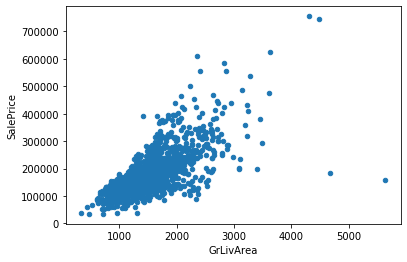

In [14]:
#Sale Price and GrLivArea ( Above grade ground living area)
df3 = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
#scatter plot
df3.plot.scatter(x = 'GrLivArea', y = 'SalePrice')


There is linear increase in sale price with increase in the area above ground. Both living area above ground and basement area might be correlated which would lead to bias in the modelling.

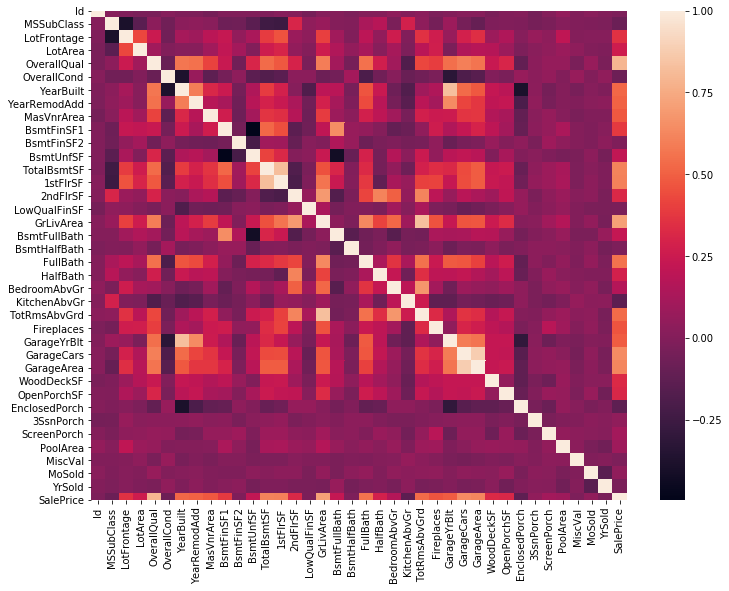

In [15]:
#Correlation plot of the numerical features
corr = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr)

In [16]:
#To see the redundant features which might cause multicollinearity
sol = (corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol[0:10])

GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
dtype: float64


The top four feature pairs contain the redundant features which can be taken out while fitting the model to avoid problems due to multicollinearity.

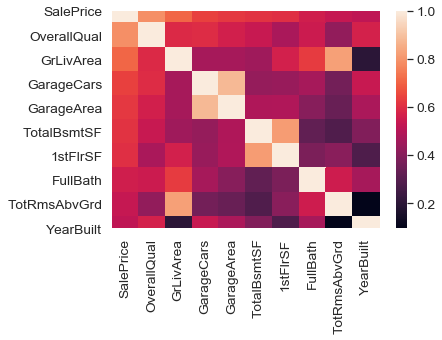

In [17]:
#To see the features which are correlated to Sale Price
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
#From series provides k largest value index
corr_mat = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(corr_mat, yticklabels = cols, xticklabels = cols)


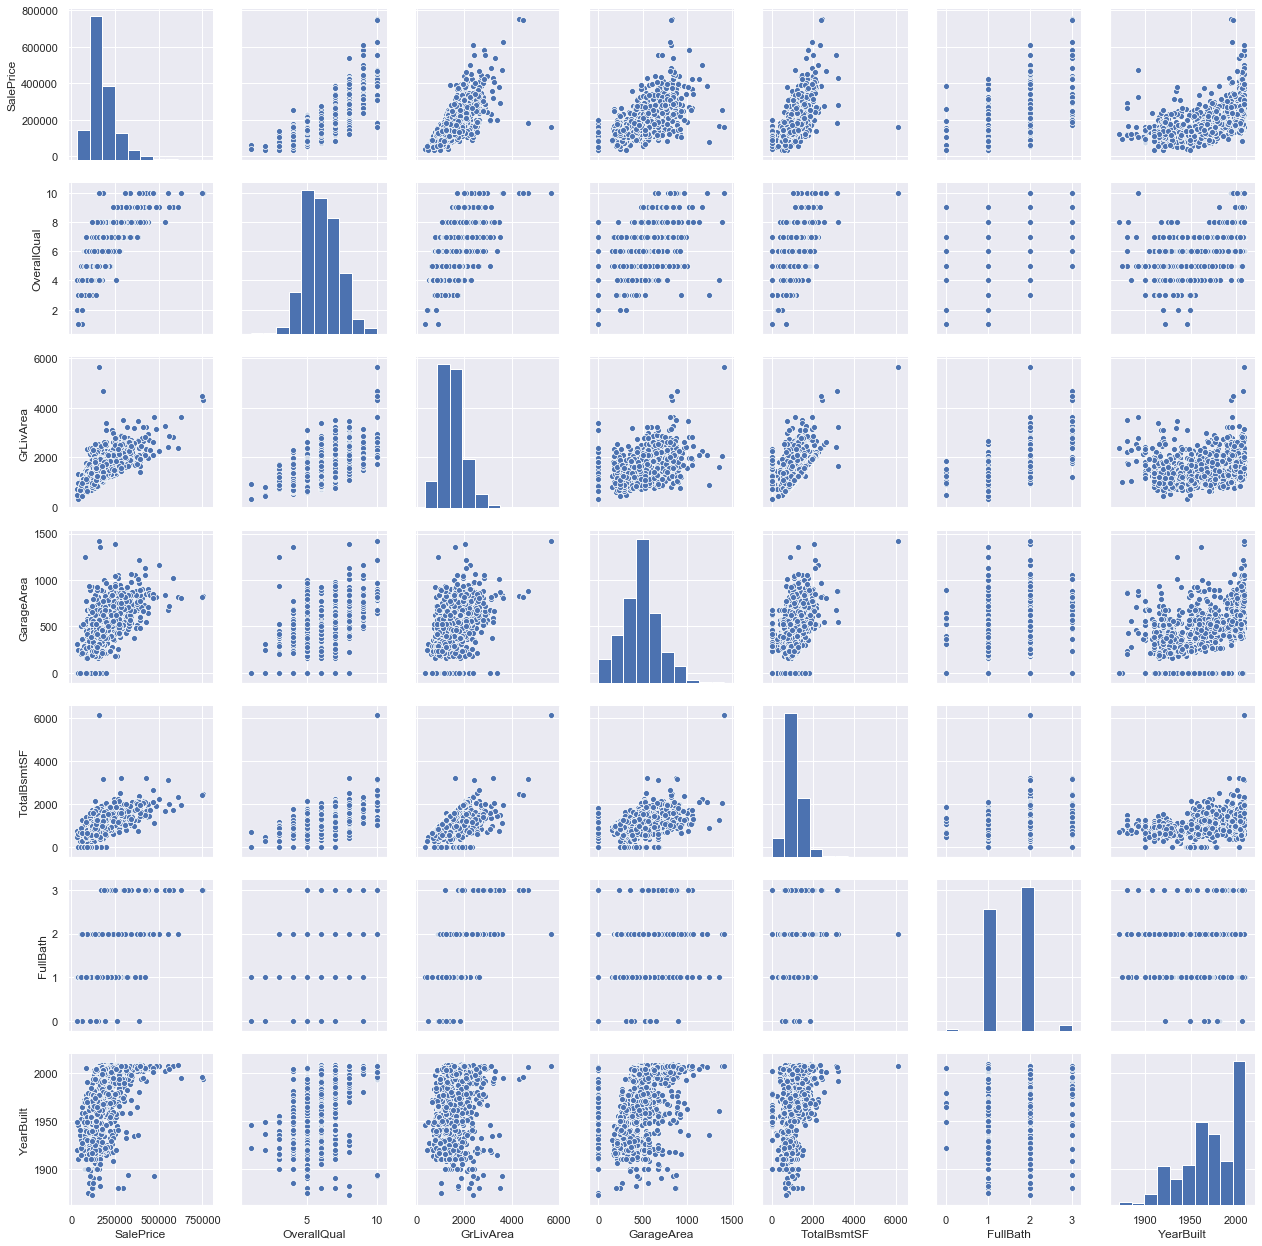

In [18]:
ncols = ['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']

sns.set()
sns.pairplot(df_train[ncols], height = 2.5)
plt.show()


Full bath is the only categorical feature with some positive correlation with the Sale Price. Interestingly, TotalBsmtSF and GrLiveArea creates a pattern where most of the records are below a straight line.... These might cause some biasness in the model. 

Next We will combine the train and test data for missing values in both train and test data and create a new array for our dependant variable.


In [237]:
#Dependant variable
y_train = df_train.SalePrice.values
#Whole data set
df = pd.concat((df_train, df_test)).reset_index(drop=True)
#Remove SalePrice from the whole dataset
df.drop(['SalePrice'], axis = 1, inplace = True)
df.shape

C:\Users\mmalhotra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(2919, 79)

In [205]:
#Get the missing data in the whole data

total_null = df.isnull().sum().sort_values(ascending=False)
#df.isnull().sum() group by null values in each column and then sum them and save them as series indexed by the column name

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data[0:30]

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageCond,159,0.054471


In [119]:
df.loc[df['GarageArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2576,942,886,0,None,3,1Fam,TA,No,548.0,0.0,...,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


Hmm... So there is a lot of missing data. Some of it is interpreted wrong. For example most of the features(Like PoolQC) are categorical. So NA simply means None in these features. But again we also need to look into the fact of other complimentary feature matches that or not. For example, for PoolQC to be None, PoolArea should be zero. However, there are some features which do not rely on others like Alley or MiscFeature. First we can impute their missing values.

And then, we can look into others.

* Alley, MiscFeature, Fence

In [238]:
#Fill for 'Alley', 'MiscFeature', 'Fence'
df['Alley'] = df['Alley'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')

Now, lets look into others one by one. First poolX

In [239]:
df_pool = df[(df['PoolArea'] != 0) & (df['PoolQC'].isnull())]
df_pool[['PoolArea', 'PoolQC', 'Fence', 'GarageQual', 'GarageType', 'OverallQual']]

,PoolArea,PoolQC,Fence,GarageQual,GarageType,OverallQual
2420,368,NaN,GdPrv,TA,Attchd,4
2503,444,NaN,None,TA,Attchd,6
2599,561,NaN,GdPrv,TA,2Types,3


So, obviously not all missing PoolQC are None there are values which should be given some PoolQC. Lets take a general look of PoolQC with OverallQual

Hmm.. interesting. First of all people don't tend to rate any pool typical or average! Secondly, overall Quality has some impact on the pool quality. Mostly, houses with overall qual 8-10 have excellent pools but there are some houses with good pools also. Overall qual between 6-7 are either fair or good. Overall any rating above 7 can be considered good or excellent. So the question will what should be the how will we put the missing values! Obviously below 6 people even don't want to give the rating! It's kind of not having a pool. But we can assume it to be Fair. But for overall Qual 6 it can be good or fair. Since for that pool the pool area is also not that big I would prefereably give fair.

In [240]:
#Change the PoolQC rows and fill the other NAs with None
df.loc[(df['PoolArea'] < 7) & (df['PoolQC'].isnull()), ['PoolQC']] = 'Fa'
df['PoolQC'] = df['PoolQC'].fillna('None')
df['PoolQC'].isnull().sum()

0

No null values for Pool QC. Lets look at another feature.

* Fireplace

In [241]:
df_fire = df[(df['Fireplaces'] != 0) & (df['FireplaceQu'].isnull())]
df_fire[['Fireplaces', 'FireplaceQu', 'Fence', 'GarageQual', 'GarageType', 'OverallQual']]

,Fireplaces,FireplaceQu,Fence,GarageQual,GarageType,OverallQual


In [242]:
#Such case convert all NAs to None
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

Next, look at GarageX. there is a common pattern in the missing values so probably there is no garage for most of them and that's why NA but (Big BUT agian) GarageType is not 159 instead 157 so lets see those two values.


In [243]:
df.loc[(df['GarageQual'].isnull()) & (df['GarageType'].notnull()), ('GarageQual', 'GarageType', 'GarageCond', 'GarageQual', 'GarageYrBlt')]

,GarageQual,GarageType,GarageCond,GarageQual,GarageYrBlt
2126,NaN,Detchd,NaN,NaN,NaN
2576,NaN,Detchd,NaN,NaN,NaN


So there are garages which are detached and they have all information. So what should be done with that test data which doesnot have any information. lets look at all the 
* GarageX features

In [244]:
col_gar = [col for col in df.filter(like = 'Garage').columns]
df.loc[(df['GarageQual'].isnull()) & (df['GarageType'].notnull()), col_gar]

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
2126,360.0,1.0,NaN,NaN,NaN,Detchd,NaN
2576,NaN,NaN,NaN,NaN,NaN,Detchd,NaN


There are two types of observations which have to be considered. For the index 2576 all of the GarageX are not there so we can convert the NAs and Detched to None because we have no information regarding the garage and consider it to be absent. For the other observation either we fill the null values with something corresponding value which will be time taking and it may overestimate the value or consider that the house does not have any garage. Now there is a trade off in taking decision here. For this case I would consider that the garage is no garage for one case and for others I would just convert the nulls to None and let my model decide.

In [245]:
df.loc[2576, 'GarageType'] = 'None'
for col in ['GarageFinish', 'GarageQual', 'GarageType', 'GarageCond']:
    df[col] = df[col].fillna('None')

for col in ['GarageArea', 'GarageCars', 'GarageYrBlt']:
    df[col] = df[col].fillna(0)

No nulls in the GarageX features. However, while looking at some graphs I realised there is a weird observation with the GarageBltYr which is 2207 (Lolz) and year built is 2006. Probably it might be a typo error.


In [246]:
df.loc[df['GarageYrBlt'] > 2010, 'GarageYrBlt'] = 2007

* BasementX features

In [247]:
col_bst = [col for col in df.filter(like = 'Bsmt').columns]
df.loc[(df['BsmtCond'].isnull()) & (df['BsmtQual'].notnull()), col_bst]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
2040,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,Gd,0.0,1426.0
2185,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,TA,94.0,1127.0
2524,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,995.0


So, for most of the Good and TA BsmtQual, the Bsmt Cond is TA. So we can convert them to TA for all the three observations

In [248]:
df.loc[(df['BsmtCond'].isnull()) & (df['BsmtQual'].notnull()), 'BsmtCond'] = 'TA'

In [249]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna('None')


In [250]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df[col] = df[col].fillna(0)


We converted all the other nulls into None. Though it might be the case that the basement might be present but the information of that feature is not present. We should be clear that in the practical world it might be the case that we might not have the complete information and we have to take into consideration this fact and then fit the model.

* SaleType

In [251]:
#SaleType 
df.loc[df['SaleType'].isnull(), ['SaleType', 'SaleCondition']]

,SaleType,SaleCondition
2489,NaN,Normal


In [252]:
#for normal Sale Condition, the sale type is WD. (Graph in EDA)
df.loc[df['SaleType'].isnull(), 'SaleType'] = 'WD'

In [253]:
#Exterior1st
df.loc[df['Exterior1st'].isnull(), ['Exterior1st', 'Exterior2nd', 'ExterQual']]


,Exterior1st,Exterior2nd,ExterQual
2151,NaN,NaN,TA


So the Exteriror has avergae quality but we dont know the Exterior material. We can fill with the mode.

In [222]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

* MasVnrType and MasVnrArea

In [254]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

* LotFrontage

In [255]:
#Since in the neighbourhood the average distance will be similar to many houses we can fill the null values for lotfrontage
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

* Utilities
since more than 95% of data in Utilities is Allpub, the feature wont help much in prediction. So we can drop the feature for  modelling.

In [256]:
df = df.drop(['Utilities'], axis = 1)

* Functional
It is specified it assumed to be typical. so nulls are typical

In [257]:
df['Functional'] = df['Functional'].fillna('Typ')

* Electrical

In [258]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

* MSZoning:
Can be filled with the mode

In [259]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

* Exterior1st and Exterior2nd

In [260]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

* KitchenQual

In [261]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [231]:
df.isnull().sum().sort_values(ascending=False)

YrSold         0
Foundation     0
ExterCond      0
ExterQual      0
Exterior1st    0
              ..
MSSubClass     0
MSZoning       0
MasVnrArea     0
MasVnrType     0
1stFlrSF       0
Length: 78, dtype: int64

__Transforming some numerical data into string datatype__

In [262]:
#Year Sold and Month sold
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

#MSSubclass
df['MSSubClass'] = df['MSSubClass'].astype(str)

#OverallQual and OverallCond
df['OverallQual'] = df['OverallQual'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)

__New Feature for surface area__

In [263]:
# adding one more feature
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [264]:
df.shape

(2919, 79)

__Skewness in the data__

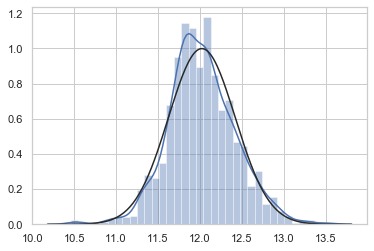

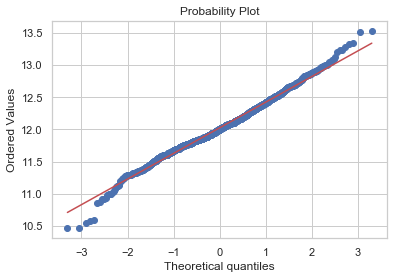

In [201]:
#Histogram and QQ plot for sales price to check normality
from scipy.stats import norm, skew
import scipy.stats

sns.distplot(y_train, fit=norm)
fig = plt.figure()
res = sc.stats.probplot(y_train, plot = plt)


The sale price is skewed in the distribution plot. Also the Probability plot is not a straight line but curved. Convert the sale price into log transformation.


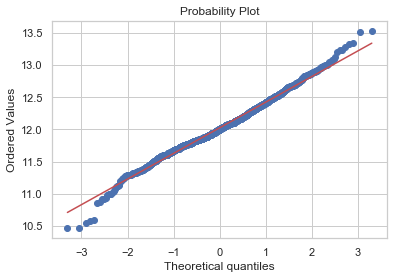

In [265]:
y_train = np.log1p(y_train)

#plot again the probability plot
fig = plt.figure()
res = sc.stats.probplot(y_train, plot = plt)

There are some values which do not lie on the straight line. Can be outliers

In [266]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


Transform data to decrease the skewness in the data. Making it near to Normal

In [268]:
skewed_feat = skewed_feats[skewed_feats > 0.75].index

df[skewed_feat] = np.log1p(df[skewed_feat])

__Transform some of the features using label encoder__

In [269]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features may transform ordered data
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

__Getting dummy categorical variables__

In [271]:
df = pd.get_dummies(df)
df.shape

(2919, 230)

In [273]:
X_train = df[:ntrain]
X_test = df[ntrain:]

print('Shape of training data is, ', X_train.shape)
print('Shape of testing data is, ', X_test.shape)

Shape of training data is,  (1460, 230)
Shape of testing data is,  (1459, 230)


__Model Fitting__

In [279]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


In [277]:
model_ridge = Ridge()

In [280]:
#Alpha is the regularization parameter, we'll cross validate for different alphas
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

Text(0, 0.5, 'rmse')

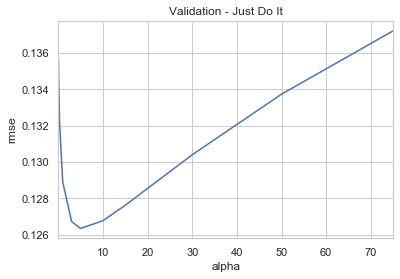

In [281]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

My favourite U-shaped graph for ridge regression. So if alpha is increasing the model is becoming less complex which is not performing good in this case. However with very low alpha value the model is overfitting and thats why higher RMSE. The optimum alpha will provide features that can explain the variation in SalePrice.

In [283]:
cv_ridge.min()

0.1263460936490533

Minimum RMSE for ridge model is 0.126

Lets fook for a Lasso model

In [284]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

C:\Users\mmalhotra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [285]:
rmse_cv(model_lasso).mean()

C:\Users\mmalhotra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mmalhotra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mmalhotra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mmalhotra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will ch

0.12321924354712921

So, in this case Lasso is doing better than Ridge. Good thing about Lasso is that it will also do th efeature selection for us because of its Laplace distribution.

In [286]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [287]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 110 variables and eliminated the other 120 variables


In [288]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

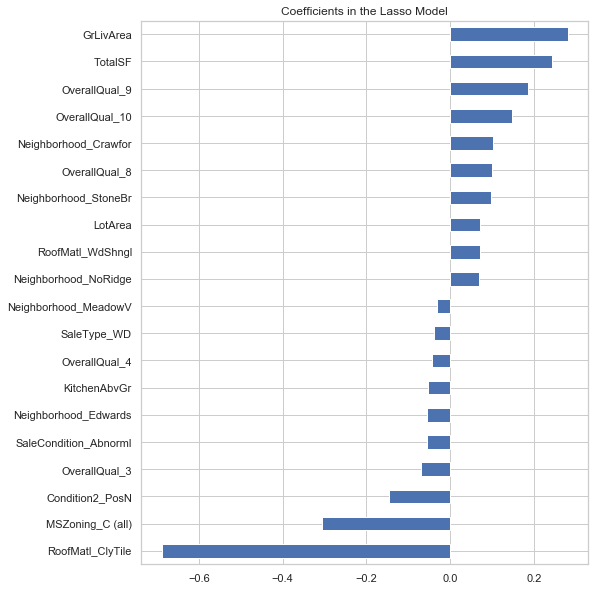

In [290]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

So firstly Lasso picked 110 variables for fitting the model rather than all. Next, of all the variables GrLivArea plays a very important role in predicting the Sale price of a house. TotalSF (Feature we engineered) also plays an important role in the decision making. Some of the negative features that impact the prediction are due to unbalanced catergorical variables. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


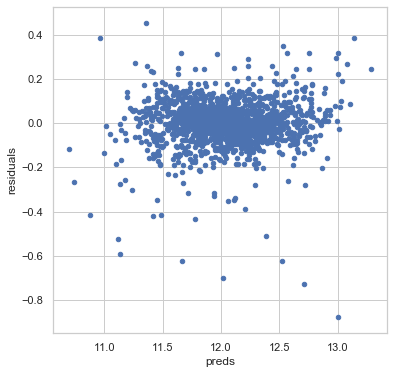

In [291]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Residual graph is nice. There is no pattern in the residuals which shows that the errors are distributed randomly.